In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/Readme.txt
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_15.tif
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_8.tif
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_6.tif
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_11.tif
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_4.tif
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_14.tif
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_13.tif
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_10.tif
/kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID/RASTER_0.tif
/ka

In [2]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 82.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.io import imread
from skimage.transform import resize
import rasterio
import tensorflow as tf
from tensorflow.keras.utils import normalize
from pathlib import Path
from sklearn.model_selection import train_test_split

In [4]:
data_dir = '/kaggle/input/deforestation-detection-dataset'
for root, dirs, files in os.walk(data_dir):
    print("Directory:", root)
    print("Subdirectories:", dirs)
    print("Files:", files)
    print()

Directory: /kaggle/input/deforestation-detection-dataset
Subdirectories: ['2_CLOUDY_DATASET', '1_CLOUD_FREE_DATASET', '3_TRAINING_MASKS']
Files: []

Directory: /kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET
Subdirectories: ['1_SENTINEL1', '2_SENTINEL2']
Files: ['Readme.txt']

Directory: /kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1
Subdirectories: ['IMAGE_16_GRID', 'IMAGE_FULL']
Files: []

Directory: /kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_16_GRID
Subdirectories: []
Files: ['RASTER_15.tif', 'RASTER_8.tif', 'RASTER_6.tif', 'RASTER_11.tif', 'RASTER_4.tif', 'RASTER_14.tif', 'RASTER_13.tif', 'RASTER_10.tif', 'RASTER_0.tif', 'RASTER_3.tif', 'RASTER_1.tif', 'RASTER_5.tif', 'RASTER_7.tif', 'RASTER_12.tif', 'RASTER_2.tif', 'RASTER_9.tif']

Directory: /kaggle/input/deforestation-detection-dataset/2_CLOUDY_DATASET/1_SENTINEL1/IMAGE_FULL
Subdirectories: []
Files: ['raster.tif']

Directory: /kaggle/input/deforest

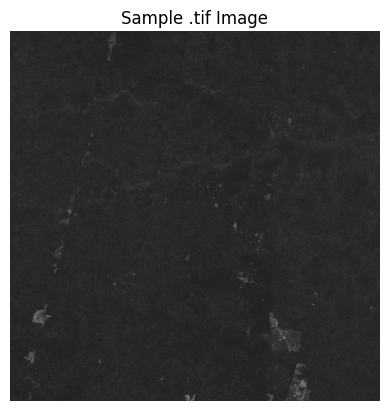

In [5]:
#display a sample file
sample_file = '/kaggle/input/deforestation-detection-dataset/1_CLOUD_FREE_DATASET/2_SENTINEL2/IMAGE_16_GRID/RASTER_0.tif'
with rasterio.open(sample_file) as src:
    image = src.read(2) 
    plt.imshow(image, cmap='gray')
    plt.title("Sample .tif Image")
    plt.axis('off')
    plt.show()

In [6]:

from rasterio.windows import Window

file_path = '/kaggle/input/deforestation-detection-dataset/1_CLOUD_FREE_DATASET/2_SENTINEL2/IMAGE_16_GRID/RASTER_0.tif'

# Open dataset
with rasterio.open(file_path) as dataset:
    # Get dataset dimensions
    width = dataset.width
    height = dataset.height
    print(f"Dataset dimensions: {width} x {height}")

    # Define window size (e.g., 512x512 pixels)
    window_size = 512

    # Iterate over the dataset in windows
    for i in range(0, height, window_size):
        for j in range(0, width, window_size):
            # Define the window
            window = Window(j, i, window_size, window_size)
            # Read the data within the window
            data = dataset.read(1, window=window)  # Reading the first band
            print(f"Read window (({i}, {j}), {window_size}, {window_size}) - Data shape: {data.shape}")
            # Process the data as needed
            # For example, calculate the mean of the window
            window_mean = data.mean()
            print(f"Window mean value: {window_mean}")


Dataset dimensions: 2816 x 2816
Read window ((0, 0), 512, 512) - Data shape: (512, 512)
Window mean value: 162.63986206054688
Read window ((0, 512), 512, 512) - Data shape: (512, 512)
Window mean value: 153.13653564453125
Read window ((0, 1024), 512, 512) - Data shape: (512, 512)
Window mean value: 149.14645385742188
Read window ((0, 1536), 512, 512) - Data shape: (512, 512)
Window mean value: 151.78073120117188
Read window ((0, 2048), 512, 512) - Data shape: (512, 512)
Window mean value: 178.3809814453125
Read window ((0, 2560), 512, 512) - Data shape: (512, 256)
Window mean value: 177.00616455078125
Read window ((512, 0), 512, 512) - Data shape: (512, 512)
Window mean value: 160.99537658691406
Read window ((512, 512), 512, 512) - Data shape: (512, 512)
Window mean value: 156.65960693359375
Read window ((512, 1024), 512, 512) - Data shape: (512, 512)
Window mean value: 153.7206268310547
Read window ((512, 1536), 512, 512) - Data shape: (512, 512)
Window mean value: 159.736328125
Read 

In [7]:
array_size = 31724006
for i in range(1, int(math.sqrt(array_size)) + 1):
    if array_size % i == 0:
        print(f"Possible dimensions: {i} x {array_size // i}")

Possible dimensions: 1 x 31724006
Possible dimensions: 2 x 15862003
Possible dimensions: 17 x 1866118
Possible dimensions: 34 x 933059


In [8]:
num_bands = array_size // (512 * 512)  # 512 can be replaced with other numbers
print(f"Number of bands: {num_bands}")

Number of bands: 121


In [9]:
image_dir = '/kaggle/input/deforestation-detection-dataset/1_CLOUD_FREE_DATASET/2_SENTINEL2/IMAGE_16_GRID/'
mask_dir = '/kaggle/input/deforestation-detection-dataset/3_TRAINING_MASKS/MASK_16_GRID/'

# Parameters
IMG_HEIGHT, IMG_WIDTH = 256, 256  # Fixed size for training
BATCH_SIZE = 16

In [10]:
# Preprocess function
def preprocess_image(filepath, target_size=(IMG_HEIGHT, IMG_WIDTH)):
    image = imread(filepath)  # Read image
    image = normalize(image, axis=1)  # Normalize to [0, 1]
    image = resize(image, target_size, mode='reflect', anti_aliasing=True)  # Resize
    return image

def preprocess_mask(filepath, target_size=(IMG_HEIGHT, IMG_WIDTH)):
    mask = imread(filepath, as_gray=True)  # Read mask (grayscale)
    mask = resize(mask, target_size, mode='reflect', anti_aliasing=True)  # Resize
    mask = np.round(mask)  # Ensure binary values (0 or 1)
    return mask

# Load data
image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.tif')])
mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.tif')])

images = np.array([preprocess_image(f) for f in image_files])
masks = np.array([preprocess_mask(f) for f in mask_files])

print(f"Images shape: {images.shape}, Masks shape: {masks.shape}")

Images shape: (16, 256, 256, 4), Masks shape: (16, 256, 256)


In [12]:
def load_and_preprocess_sentinel_image(tif_path, is_mask=False):
    
    with rasterio.open(tif_path) as src:
        if is_mask:
            # For masks: load single band and ensure binary values
            mask = src.read(1)  # Read first band only
            mask = (mask > 0).astype(np.float32)  # Convert to binary (0 and 1)
            return mask
        else:
            # For images: load all 4 bands
            image = src.read()
            
            # Normalize values (based on your data range)
            image = image / 6000.0  # Adjust based on your max value (~5794)
            
            # Transpose to channel-last format (HEIGHT, WIDTH, CHANNELS)
            image = np.transpose(image, (1, 2, 0))
            
            return image

def load_dataset(image_dir, mask_dir, image_size=(256, 256)):
    
    # Get file lists
    image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.tif')])
    mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.tif')])
    
    # Lists to store processed data
    images = []
    masks = []
    
    print("Loading and preprocessing data...")
    
    for img_path, mask_path in zip(image_files, mask_files):
        # Load and preprocess image
        img = load_and_preprocess_sentinel_image(img_path, is_mask=False)
        
        # Load and preprocess mask
        mask = load_and_preprocess_sentinel_image(mask_path, is_mask=True)
        
        # Resize if needed
        if image_size is not None:
            img = tf.image.resize(img, image_size)
            mask = tf.image.resize(mask[..., np.newaxis], image_size)
        
        images.append(img)
        masks.append(mask)
    
    # Convert to numpy arrays
    images = np.array(images)
    masks = np.array(masks)
    
    print(f"Dataset loaded successfully!")
    print(f"Images shape: {images.shape}")
    print(f"Masks shape: {masks.shape}")
    
    return images, masks

# Example usage
def prepare_training_data(image_dir, mask_dir, image_size=(256, 256), val_split=0.2):
   
    # Load dataset
    images, masks = load_dataset(image_dir, mask_dir, image_size=image_size)
    
    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        images, masks, test_size=val_split, random_state=42
    )
    
    print("\nData split complete:")
    print(f"Training images shape: {X_train.shape}")
    print(f"Training masks shape: {y_train.shape}")
    print(f"Validation images shape: {X_val.shape}")
    print(f"Validation masks shape: {y_val.shape}")
    
    return X_train, X_val, y_train, y_val

# Use the functions
image_dir = "/kaggle/input/deforestation-detection-dataset/1_CLOUD_FREE_DATASET/2_SENTINEL2/IMAGE_16_GRID"
mask_dir = "/kaggle/input/deforestation-detection-dataset/3_TRAINING_MASKS/MASK_16_GRID"

# Prepare the data
X_train, X_val, y_train, y_val = prepare_training_data(
    image_dir, 
    mask_dir,
    image_size=(256, 256),  # Resize images to 256x256
    val_split=0.2
)

Loading and preprocessing data...
Dataset loaded successfully!
Images shape: (16, 256, 256, 4)
Masks shape: (16, 256, 256, 1)

Data split complete:
Training images shape: (12, 256, 256, 4)
Training masks shape: (12, 256, 256, 1)
Validation images shape: (4, 256, 256, 4)
Validation masks shape: (4, 256, 256, 1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.0519 - io_u_1: 0.0000e+00 - loss: 0.6961 - val_accuracy: 1.0000 - val_io_u_1: 0.0000e+00 - val_loss: 0.5186 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 1.0000 - io_u_1: 0.0000e+00 - loss: 0.5235 - val_accuracy: 1.0000 - val_io_u_1: 0.0000e+00 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 1.0000 - io_u_1: 0.0000e+00 - loss: 0.0210 - val_accuracy: 1.0000 - val_io_u_1: 0.9742 - val_loss: 1.3491e-05 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 1.0000 - io_u_1: 0.9735 - loss: 1.3597e-05 - val_accuracy: 1.0000 - val_io_u_1: 0.9999 - val_loss: 7.0175e-09 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 1.0000 - io_u_1: 0.9999 - loss: 6.8948e-09 - val_accuracy: 1.0000 - val_io_u_1: 1.0000 - val_loss: 8.2343e-17 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━

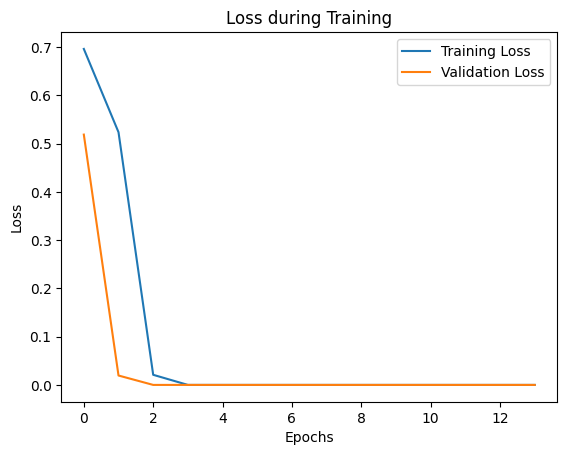

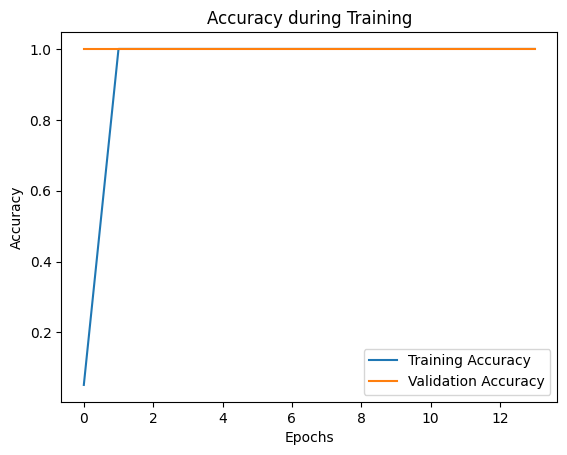

In [13]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout

def UNET(input_shape=(256, 256, 4)):
    
    inputs = Input(input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Bridge
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(conv3)
    up1 = concatenate([conv2, up1], axis=3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up1)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)
    
    up2 = UpSampling2D(size=(2, 2))(conv4)
    up2 = concatenate([conv1, up2], axis=3)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up2)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)
    
    # Output
    outputs = Conv2D(1, 1, activation='sigmoid')(conv5)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model


# Create model
model = UNET(input_shape=(256, 256, 4))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1])]
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=16,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3)
    ]
)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predict on validation dataset with thresholding
predicted_masks = (model.predict(X_val) > 0.5).astype(np.uint8)
print(f"Predicted masks shape: {predicted_masks.shape}")

# Define the missing plot_sample function
def plot_sample(image, ground_truth, prediction, index):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(image[index])
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth')
    plt.imshow(ground_truth[index], cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title('Prediction')
    plt.imshow(prediction[index], cmap='gray')
    plt.axis('off')
    
    plt.show()

# Function to plot samples with ground truth and predictions
def plot_samples(images, ground_truths, predictions, num_samples=5):
    for i in range(min(num_samples, len(images))):
        plot_sample(images, ground_truths, predictions, index=i)

# Display first 5 samples
plot_samples(X_val, y_val, predicted_masks)
